In [143]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.

In [147]:

from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import sys



options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
broswer = webdriver.Chrome('chromedriver', options=options)

# 페이지 이동
url = "https://store.steampowered.com/search/Steam?supportedlang=koreana%2Cenglish&category1=998&ndl=1"
broswer.get(url)
import time
interval = 2 # 2초에 한번씩 스크롤 내림
time.sleep(interval)

import time



# 현재 문서 높이를 가져와서 저장
prev_height = broswer.execute_script("return document.body.scrollHeight")
# broswer.execute_script("ChangeLanguage( 'koreana' )")
# 반복 수행
while True:
  # 스크롤 가장 아래로 내림
  broswer.execute_script("window.scrollTo(0, document.body.scrollHeight)")
  # 페이지 로딩 대기
  time.sleep(interval)
  # 현재 문서 높이를 가져와서 저장
  curr_height = broswer.execute_script("return document.body.scrollHeight")
  if curr_height == prev_height:
    break
  prev_height = curr_height


print("스크롤 완")
#브라우저페이지를 읽어옴
#lxml은 구문을 분석하기 위한 파서
soup = BeautifulSoup(broswer.page_source, "lxml")

#게임리스트가있는 태그 id를 읽어옴
games = soup.find_all("div", attrs={"id": "search_resultsRows"})


#공백리스트 생성
appno_list=[]
title_list=[]
released_list=[]
rating_list=[]
rating_per_list=[]
rating_count_list=[]
real_price_list=[]
discount_per_list=[]
discount_price_list=[]


#읽어온 game들을 필요한 정보를 얻기 위해 가공  ~~.find_all("태그",attrs={"속성":"값"})
#find("태그",class)
for game in games:
  appnos=game.find_all("a")
  titles=game.find_all("span",attrs={"class":"title"})
  released=game.find_all("div",attrs={"class":"col search_released responsive_secondrow"})
  reviews_temp=game.find_all("div",attrs={"class":"col search_reviewscore responsive_secondrow"})
  prices=game.find_all("div",attrs={"class":"col search_price_discount_combined responsive_secondrow"})



스크롤 완


In [148]:
#리스트 초기화 
appno_list.clear()
title_list.clear()
released_list.clear()
rating_list.clear()
rating_per_list.clear()
rating_count_list.clear()

#app넘버
#미출시는 appno가 없을 수 있다.
for i in appnos:
  try:
    temp=i.attrs['data-ds-appid']
    appno_list.append(temp)
  except:
    appno_list.append("")

# 이름
for title in titles:
  title_list.append(title.string)


for i in released:
  temp=i.get_text()
  released_list.append(temp)

#  평가, 비율 ,평가 인원수
for reviews in reviews_temp:
  rating=""
  rating_per=""
  rating_count=""
  if reviews.select("span") == [] :
    #평가가없는건 비인기게임or신작
    rating=" "
    rating_per=" "
    rating_count=" "
  else:
    #평가 존재시 파싱
    temp=reviews.find("span")
    temp2=str(temp.attrs["data-tooltip-html"])
    temp3=temp2.split("<br>")
    temp4=temp3[1].split("%")
    temp5=temp4[1].split("of the ")
    temp6=temp5[1].split(" user")
    temp5=temp4[1].split("of the ")
    temp6=temp5[1].split(" user")
    rating=temp3[0]
    rating_per=temp4[0]+"%"
    rating_count=temp6[0]
  rating_list.append(rating)
  rating_per_list.append(rating_per)
  rating_count_list.append(rating_count)



In [151]:
real_price_list.clear()
discount_per_list.clear()
discount_price_list.clear()
#달러버전 유로버전과 둘중하나만 해야함
#코렙 ip 혹은 스팀 서버에 따라서 매일 바뀌는걸로 유추중
#한국어버전은 ec2서버에


#<div class="col search_price discounted responsive_secondrow">
#<span style="color: #888888;"><strike>$19.99</strike></span><br/>$16.99                    </div>
list_str=["Free","FREE","Play"]
for price in prices:
  real_price=""
  discount_per=""
  discount_price=""
  if price.select("span")==[]:#span태그 없으면 무료 or 정가
    temp_fn=price.find("div", attrs={"class":"col search_price responsive_secondrow"})
    temp_fn2=str(temp_fn).split("\n")
    temp_fn3=temp_fn2[1].strip()
    temp_fn4=temp_fn3.split(" ")
    if temp_fn4[0]=="Free" or temp_fn4[0]=='</div>':#무료거나 가격이 없을때
      real_price="Free"
    else:
      real_price=temp_fn4[0]
  else:#할인 시 파싱  
    temp=price.select("span")
    temp_dis=temp[0].get_text().split("-")#할인률
    temp2=price.find("div", attrs={"class":"col search_price discounted responsive_secondrow"})
    temp3=str(temp2).split("<br/>")
    temp4=temp3[1].split(" ")
    real_price=temp2.find("strike").get_text()
    discount_per=temp_dis[1]
    discount_price=temp4[0]
  real_price_list.append(real_price)
  discount_per_list.append(discount_per)
  discount_price_list.append(discount_price) 


In [ ]:
#유로버전 달러 에러나면 이걸로하기
real_price_list.clear()
discount_per_list.clear()
discount_price_list.clear()
for price in prices:
  real_price=""
  discount_per=""
  discount_price=""
  if price.select("span")==[]:#span태그 없으면 무료 or 정가
    temp_fn=price.find("div", attrs={"class":"col search_price responsive_secondrow"})
    temp_fn2=str(temp_fn).split("\n")
    temp_fn3=temp_fn2[1].strip()
    temp_fn4=temp_fn3.split(" ")
    if temp_fn4[0]=="Free" or temp_fn4[0]=='</div>':#무료
      real_price="Free"
    else:
      temp_fn5=temp_fn4[0].split("€")
      real_price="€"+temp_fn5[0]
    discount_per=" "
    discount_price=" "
  else:#할인 시 파싱
    temp=price.select("span")
    temp_dis=temp[0].get_text().split("-")
    temp2=price.find("div", attrs={"class":"col search_price discounted responsive_secondrow"})
    temp3=temp2.get_text().strip()
    temp4=temp3.split("€")
    real_price="€"+temp4[0]
    discount_per=temp_dis[1]
    discount_price="€"+temp4[1]
  real_price_list.append(real_price)
  discount_per_list.append(discount_per)
  discount_price_list.append(discount_price) 

In [152]:
#파싱 완료 후 개수 비교 모자르면 데이터 불일치
print(len(appno_list))
print(len(title_list))
print(len(released_list))
print(len(rating_list))
print(len(rating_count_list))
print(len(rating_per_list))
print(len(real_price_list))
print(len(discount_per_list))
print(len(discount_price_list))


54400
54400
54400
54400
54400
54400
54400
54400
54400


In [153]:
import pandas as pd

#pandas이용해서 데이터프레임으로 만들고 csv작성
#apex같은 특수문자가 있는 게임명이 깨져서 encoding을 함
data ={'appno':appno_list,
       'name' : title_list,
       'released_date':released_list,
       'rating': rating_list,
       'rating_count':rating_count_list,
       'rating_per':rating_per_list,
       'price':real_price_list,
       'sale':discount_per_list,
       'discount_price':discount_price_list}
df=pd.DataFrame(data)
df.to_csv("./steam_kr_en2.csv",encoding='UTF-8-sig')


In [154]:
#비정형 규칙
#Wishlist가 포함되거나 To Be Announced , A Colorful Adventure
#TBA ,when it's ready,TBD
#Comming이 포함되면 미정이므로 Comming으로 통일
#나머진 날짜 27 Oct, 2022을 날짜 데이터로
#너무많음 예외가
#확인결과 확실한 규칙이 없는 것은 미출시게임
# atypical_list=["Wishlist","To","A","TBA","Coming","when","TBD","Add","COMING","wishlist","now","2023","WISHLIST","soon"]
#얼리액세스 제외 확실히 출시한 게임은 정형데이터
import pandas as pd
df=pd.read_csv('./steam_kr_en2.csv', index_col = None)
def released_processing(x):
  temp=str(x).split(",")
  try:
    date = temp[0]+temp[1]
    result = datetime.strptime(date, '%b %d %Y').strftime('%Y-%m-%d')
    print(result)
    return result
  except Exception as e:
    print(e)
    return ""

df['released_date'] = df.apply(lambda x:released_processing(x['released_date']),axis=1)
df.to_csv("./steam_kr_en2.csv",encoding='UTF-8-sig',index = None)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2022-08-17
2020-11-15
2017-08-22
2021-05-17
2017-11-22
2022-04-05
2022-03-07
2019-05-30
2019-02-15
2020-04-03
2018-06-11
2021-03-31
2021-05-28
2018-01-30
2016-07-30
2017-11-23
2017-10-30
2020-07-31
2017-11-06
2020-11-03
2022-01-15
2020-07-20
2018-05-11
2018-02-28
2020-05-11
2019-10-18
2016-10-19
2018-08-29
2021-10-08
2019-01-21
2019-01-30
2021-11-16
2021-08-31
2016-04-20
2019-06-06
2022-01-18
2020-07-23
2021-09-24
2016-02-04
2018-07-05
2016-10-31
2019-04-12
2022-12-04
2018-03-28
2020-01-18
2019-10-31
2020-09-08
2022-05-04
2017-10-26
2020-07-18
2020-02-21
2018-11-30
2018-08-21
2021-01-22
2017-02-21
2020-12-14
2020-10-21
2019-12-19
2017-03-20
2020-08-03
2019-04-21
2019-06-11
2017-03-31
2018-04-04
2021-03-11
2022-06-01
2017-11-20
2021-08-26
2018-05-24
2018-12-13
2017-12-08
2021-04-01
2022-06-20
2020-10-22
2020-11-20
2020-03-06
2018-03-28
2018-03-26
2019-09-07
2018-04-19
2021-02-24
2021-07-23
2017-07-21
2021-03-17
2017-03-31
2018-12-04
2021-04-30
2021-04

2002-08-28
2022-12-10


<ipython-input-142-a06bb8df6166>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['sale'] = df_positive.apply(lambda x:trans_sales(x['sale']),axis=1)
<ipython-input-142-a06bb8df6166>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['released_date'] = df_positive.apply(lambda x:date_interval(x['released_date']),axis=1)
<ipython-input-142-a06bb8df6166>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

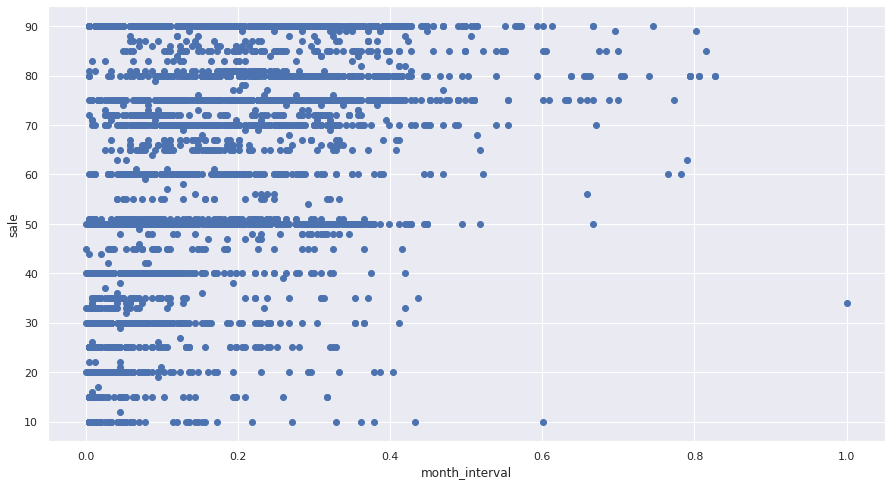

In [ ]:
#할인하는 품목 중 rating이 좋은 평가일때 
#릴리즈 날짜와 평가수와 할인율의 관계
#AI프로그래밍 4주차 강의 참조
import datetime
import time
from dateutil.relativedelta import relativedelta
import pandas as pd
from datetime import datetime
df=pd.read_csv('./steam_kr_en2.csv', index_col = None)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


df2=df[:]
#결측치가 있는 데이터 제거 
#세일을 안하고 정식릴리즈를 하지않은 데이터 제거
#즉 모든 품목에 데이터가 있음
df2.dropna(inplace=True)


#Very Positive' 'Overwhelmingly Positive' 'Mostly Positive' 'Positive'
df_positive=df2[(df2['rating']=='Very Positive') | 
                (df2['rating']=='Overwhelmingly Positive') | (df2['rating']=='Mostly Positive') | (df2['rating']=='Positive')]

#숫자가 작을 수록 최근
def date_interval(x):
  try:
    today=datetime.now()
    temp=x.split("-")
    temp_y=temp[0]
    temp_m=temp[1]
    time_interval=today-relativedelta(years=int(temp_y),months=int(temp_m))
    result=int(time_interval.year*12)+int(time_interval.month)
    return result
  except:
    #년도차가 0이면 인덱싱 에러 따라서 월만 뺌
    today=datetime.now()
    temp=x.split("-")
    temp_m=temp[1]
    time_interval=today-relativedelta(months=int(temp_m))
    result=int(time_interval.month)
    return result


def trans_count(x): #콤마 제거
  return int(x.replace(',',''))


print(df_positive['released_date'].min())
print(df_positive['released_date'].max())

def trans_sales(x):
  return int(x.replace('%',''))

df_positive['sale'] = df_positive.apply(lambda x:trans_sales(x['sale']),axis=1)
df_positive['released_date'] = df_positive.apply(lambda x:date_interval(x['released_date']),axis=1)
df_positive['rating_count'] = df_positive.apply(lambda x:trans_count(x['rating_count']),axis=1)

#데이터 정규화 절대값이 너무 큰 숫자의 영향을 최소화
#빅데이터 5주차
min_x=df_positive['released_date']-df_positive['released_date'].min()
min_max=df_positive['released_date'].max()-df_positive['released_date'].min()
df_positive['released_date']=min_x/min_max

min_x2=df_positive['rating_count']-df_positive['rating_count'].min()
min_max2=df_positive['rating_count'].max()-df_positive['rating_count'].min()
df_positive['rating_count']=min_x2/min_max2



ax= plt.axes()
ax.set_xlabel('month_interval')
ax.set_ylabel("sale")
ax.scatter(df_positive['released_date'],df_positive['sale'])

       Unnamed: 0    appno                         name released_date  \
249           249  1517290            Battlefield™ 2042    2021-11-19   
33773       33773  1832640          Mirror 2: Project X    2022-01-21   
1135         1135  1665460              eFootball™ 2023    2021-09-30   
35670       35670  1962663  Call of Duty®: Warzone™ 2.0    2022-11-16   
33777       33777  1504570            Cultivation Tales    2022-04-15   

                rating  rating_count  rating_per   price sale discount_price  \
249    Mostly Negative        123714          33  $59.99  NaN            NaN   
33773  Mostly Negative        104746          29   $1.99  40%          $1.19   
1135   Mostly Negative         44059          30    Free  NaN            NaN   
35670  Mostly Negative         15448          35    Free  NaN            NaN   
33777  Mostly Negative         12252          37  $19.99  NaN            NaN   

       bad_count  
249        40825  
33773      30376  
1135       13217  
3567

<ipython-input-155-9c9be10c5d34>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad['rating_count'] = df_bad.apply(lambda x:trans_count(x['rating_count']),axis=1)
<ipython-input-155-9c9be10c5d34>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad['rating_per'] = df_bad.apply(lambda x:trans_rating_per(x['rating_per']),axis=1)
<ipython-input-155-9c9be10c5d34>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

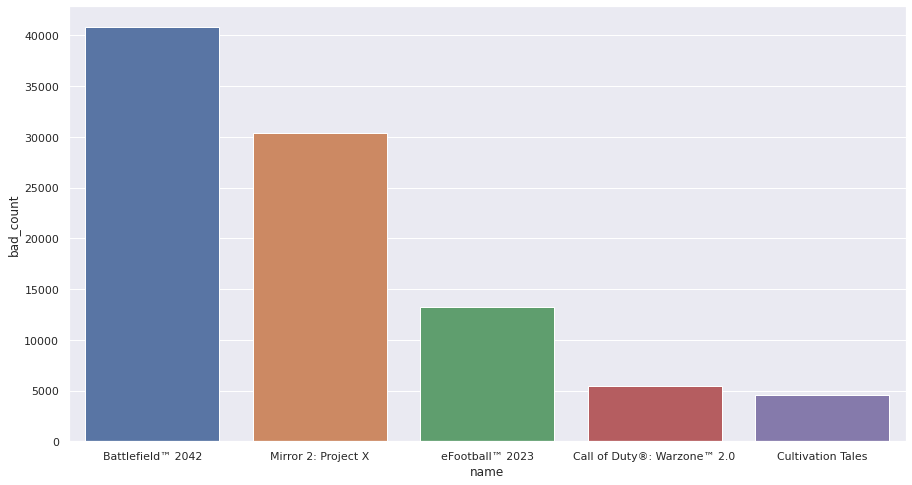

In [155]:
#가장 많은 부정적 평가를 받은 게임
#AI프로그래밍 4주차 강의 참조
import datetime
import time
from dateutil.relativedelta import relativedelta
import pandas as pd
from datetime import datetime
df=pd.read_csv('./steam_kr_en2.csv', index_col = None)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import seaborn as sns
df2=df[:]

#'Very Negative' 'Overwhelmingly Negative' 'Mostly Negative' 'Negative'
df_bad=df2[(df2['rating']=='Very Negative') | (df2['rating']=='Overwhelmingly Negative') | (df2['rating']=='Mostly Negative') | (df2['rating']=='Negative')]


#5주차 특정열을 기준으로 정렬
# df.sort_values(by='c1', ascending=False)

def trans_rating_per(x): 
  return int(x.replace('%',''))


def trans_count(x): #콤마 제거
  return int(x.replace(',',''))

def floor_data(x):
  return int(math.floor(x))

df_bad['rating_count'] = df_bad.apply(lambda x:trans_count(x['rating_count']),axis=1)
df_bad['rating_per'] = df_bad.apply(lambda x:trans_rating_per(x['rating_per']),axis=1)

df_bad['bad_count']=df_bad['rating_count']*df_bad['rating_per']/100

df_bad['bad_count'] = df_bad.apply(lambda x:floor_data(x['bad_count']),axis=1)

# 5주차 특정열을 기준으로 정렬
new_df_bad=df_bad.sort_values(by='bad_count', ascending=False)
print(new_df_bad.head())

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=new_df_bad.head(),x='name',y='bad_count')


<ipython-input-137-219c078f97c2>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['rating_count'] = df_positive.apply(lambda x:trans_count(x['rating_count']),axis=1)
<ipython-input-137-219c078f97c2>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['rating_per'] = df_positive.apply(lambda x:trans_rating_per(x['rating_per']),axis=1)
<ipython-input-137-219c078f97c2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

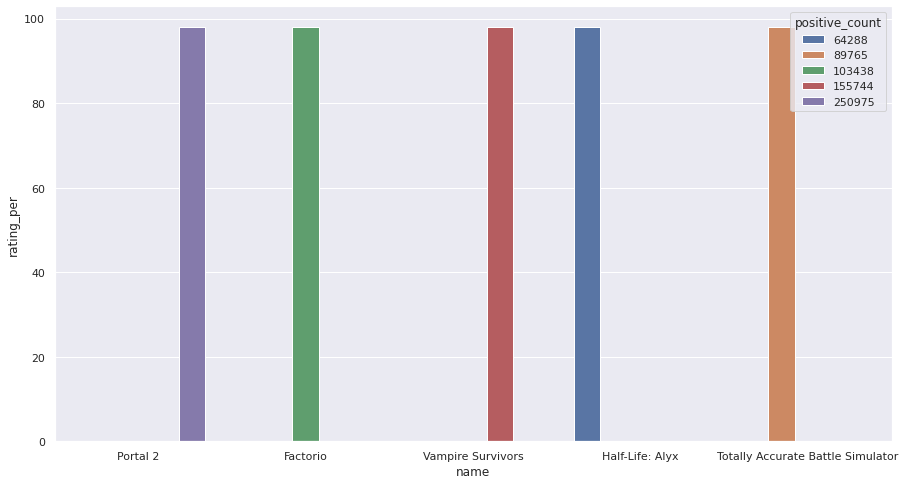

In [ ]:
#오래된 게임이면 절대적인 수는 많아서 신작이 불리함
#가장 많은 긍정적 비율
#AI프로그래밍 4주차 강의 참조
import datetime
import time
from dateutil.relativedelta import relativedelta
import pandas as pd
from datetime import datetime
df=pd.read_csv('./steam_kr_en2.csv', index_col = None)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import seaborn as sns
df2=df[:]


df_positive=df2[(df2['rating']=='Very Positive') | (df2['rating']=='Overwhelmingly Positive') | (df2['rating']=='Mostly Positive') | (df2['rating']=='Positive')]


def trans_rating_per(x): 
  return int(x.replace('%',''))

def trans_count(x): #콤마 제거
  return int(x.replace(',',''))

def floor_data(x):
  return int(math.floor(x))

df_positive['rating_count'] = df_positive.apply(lambda x:trans_count(x['rating_count']),axis=1)
df_positive['rating_per'] = df_positive.apply(lambda x:trans_rating_per(x['rating_per']),axis=1)

df_positive['positive_count']=df_positive['rating_count']*df_positive['rating_per']/100

df_positive['positive_count'] = df_positive.apply(lambda x:floor_data(x['positive_count']),axis=1)


# 5주차 특정열을 기준으로 정렬
new_df_positive=df_positive.sort_values(by='rating_per', ascending=False)

#바로 시각화를 하면 평가수는 매우 낮지만 긍정평가 비율 높은것만 나와서 기준 선정
new_df_positive2=new_df_positive[(new_df_positive['positive_count']>=50000)]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=new_df_positive2.head(),x='name',y='rating_per',hue='positive_count')


In [ ]:
#긍정 평가가 특정 수를 넘기면서 할인하고 그 가격을 오름차순으로 정렬
#AI프로그래밍 4주차 강의 참조
import datetime
import time
from dateutil.relativedelta import relativedelta
import pandas as pd
from datetime import datetime
df=pd.read_csv('./steam_kr_en2.csv', index_col = None)
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
import seaborn as sns
df2=df[:]


df_positive=df2[(df2['rating']=='Very Positive') | (df2['rating']=='Overwhelmingly Positive') | (df2['rating']=='Mostly Positive') | (df2['rating']=='Positive')]


def trans_rating_per(x): 
  return int(x.replace('%',''))

def trans_count(x): #콤마 제거
  return int(x.replace(',',''))

def floor_data(x):
  return int(math.floor(x))

df_positive['rating_count'] = df_positive.apply(lambda x:trans_count(x['rating_count']),axis=1)
df_positive['rating_per'] = df_positive.apply(lambda x:trans_rating_per(x['rating_per']),axis=1)

df_positive['positive_count']=df_positive['rating_count']*df_positive['rating_per']/100

df_positive['positive_count'] = df_positive.apply(lambda x:floor_data(x['positive_count']),axis=1)


# 5주차 특정열을 기준으로 정렬
new_df_positive=df_positive.sort_values(by='rating_per', ascending=False)

#바로 시각화를 하면 평가수는 매우 낮지만 긍정평가 비율 높은것만 나와서 기준 선정
new_df_positive2=new_df_positive[(new_df_positive['positive_count']>=50000)]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=new_df_positive2.head(),x='name',y='rating_per',hue='positive_count')

In [ ]:
#서버에서 응답 appno호출 시 성능확인해주는 역할(윈도우 기준) 
#시스템 성능요구사항 확인용
#csv에 합치는 건 x
#성능이 풀컬럼으로 정규화된게 없어서 즉각적으로 호출하는게 좋다고 판단
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import sys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select


# 예시
# Requires a 64-bit processor and operating system
# OS: Windows® 10 64 Bit (latest update)
# Processor: Intel® Core™ i3-6100 / Core™ i5-2500K or AMD Ryzen™ 3 1200
# Memory: 8 GB RAM
# Graphics: NVIDIA® GeForce® GTX 960 or AMD Radeon™ RX 470 - DirectX 12.0 compatible system
# DirectX: Version 12
# Network: Broadband Internet connection
# Storage: 125 GB available space



def app_sysreq(x):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')        # Head-less 설정
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  broswer = webdriver.Chrome('chromedriver', options=options)
  appno=x
  # 페이지 이동
  #https://store.steampowered.com/app/ + appno
  url = "https://store.steampowered.com/app/"+ appno
  broswer.get(url)
  #lxml은 구문을 분석하기 위한 파서
  soup = BeautifulSoup(broswer.page_source, "lxml")
  #성능리스트가있는 태그 id를 읽어옴 
  #class:game_area_sys_req sysreq_content active" data-os="win"
  total=soup.find("div",attrs={"class": "game_area_sys_req sysreq_content active","data-os":"win"})
  temp=""
  if total==None : # 나이제한 페이지에 걸리면 데이터 None
    try:
      broswer.find_element(By.CLASS_NAME, "agegate_birthday_selector")
      select = Select(broswer.find_element(By.ID,"ageYear"))
      select.select_by_visible_text("1997")
      broswer.execute_script("ViewProductPage()")
      time.sleep(2)
      soup = BeautifulSoup(broswer.page_source, "lxml")
    except Exception as e:
      print(e)
      print(len(temp))
  try:
    total=soup.find("div",attrs={"class": "game_area_sys_req sysreq_content active","data-os":"win"})
    temp=total.findAll("li")
  except:
    print(total)
  for ul in temp:
      print(ul.getText())

app_sysreq(df['appno'][1])
  



Requires a 64-bit processor and operating system
OS: XP SP3 or later
Processor: Dual Core CPU - 2.4GHz+
Memory: 4 GB RAM
Graphics: 1GB of VRAM: Intel HD 3000 GPU / AMD HD 5450 / Nvidia 9400 GT
Storage: 500 MB available space
Additional Notes: Requires 64 bit processor and operating system
Requires a 64-bit processor and operating system
Processor: Dual Core CPU - 4GHz+
Memory: 4 GB RAM
Storage: 500 MB available space
